In [1]:
import pandas as pd
from plotting import plot_boxplots_and_outliers, plot_numeric_distributions, plot_value_counts, plot_correlation_matrix, plot_by_year_buckets

In [2]:
tracks_df = pd.read_json('../data/formatted_tracks.json')
artists_df = pd.read_json('../data/formatted_artists.json')
albums_df = pd.read_json('../data/formatted_albums.json')

In [3]:
tracks_df.head()

,added_at,id,uri,name,popularity,track_number,disc_number,explicit,duration_ms,album_id,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,sub_genre,main_genre
0,2024-05-07 21:42:01,2MJkQZEB0YNJbnQ59dZ0Pp,spotify:track:2MJkQZEB0YNJbnQ59dZ0Pp,Wish,67,1,1,False,156000,3yLxcdaNKhpogNECAju75d,...,1,0.0361,0.986,0.837000,0.0858,0.3440,160.134,4,indie,rock
1,2024-05-07 21:41:55,7q1jVcAVKoGHhX6tMiXe6D,spotify:track:7q1jVcAVKoGHhX6tMiXe6D,Please Stay,58,2,1,False,144204,1ghe8W4YxdcimjnpguMQTr,...,0,0.0288,0.931,0.900000,0.1160,0.4850,109.989,4,indie,rock
2,2024-05-04 11:21:04,4ZZ0RMb49n8hZZvXnxRsjo,spotify:track:4ZZ0RMb49n8hZZvXnxRsjo,Skimming Stones,33,7,1,False,137624,0ET7qPmTvZttpRARj5JSBA,...,1,0.1550,0.612,0.004090,0.1040,0.2710,86.547,4,hip hop,hip hop/rap
3,2024-05-04 09:29:16,4zIeRcsaho6lZuaXEYR1y3,spotify:track:4zIeRcsaho6lZuaXEYR1y3,Easier Said Than Done,74,3,1,False,174706,6ofJrAZaaX0iWTXYXObUxE,...,1,0.0246,0.668,0.000003,0.1320,0.5630,84.127,4,indie,rock
4,2024-05-03 20:00:43,6TLGmbTgp7hJ7jsDTTHRzw,spotify:track:6TLGmbTgp7hJ7jsDTTHRzw,Notion,60,3,1,False,340999,1jTdlev7AEaZWCDD2vBiQS,...,0,0.0300,0.390,0.008710,0.1880,0.0699,184.318,3,reggae,folk/world


# Feature extraction

## Let's see what we can extract from albums

In [4]:
# get album size
def get_album_size(track):
    album_id = track['album_id']
    album = albums_df[albums_df['id'] == album_id].to_dict('records')
    if not album:
        return None
    album = album[0]
    return album['total_tracks']

tracks_df['album_size'] = tracks_df.apply(get_album_size, axis=1)

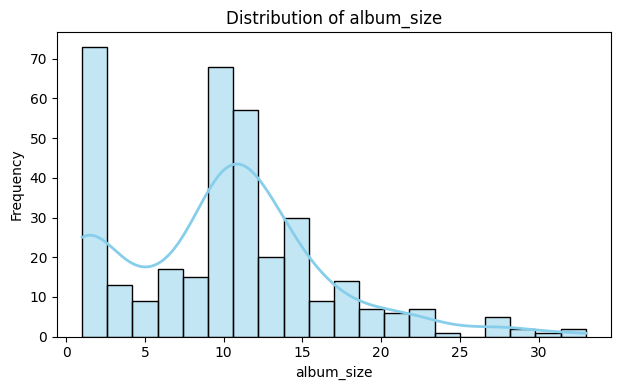

In [5]:
plot_numeric_distributions(tracks_df, ['album_size'])

In [6]:
# get album popularity
def get_album_popularity(track):
    album_id = track['album_id']
    album = albums_df[albums_df['id'] == album_id].to_dict('records')
    if not album:
        return None
    album = album[0]
    return album['popularity']

tracks_df['album_popularity'] = tracks_df.apply(get_album_popularity, axis=1)

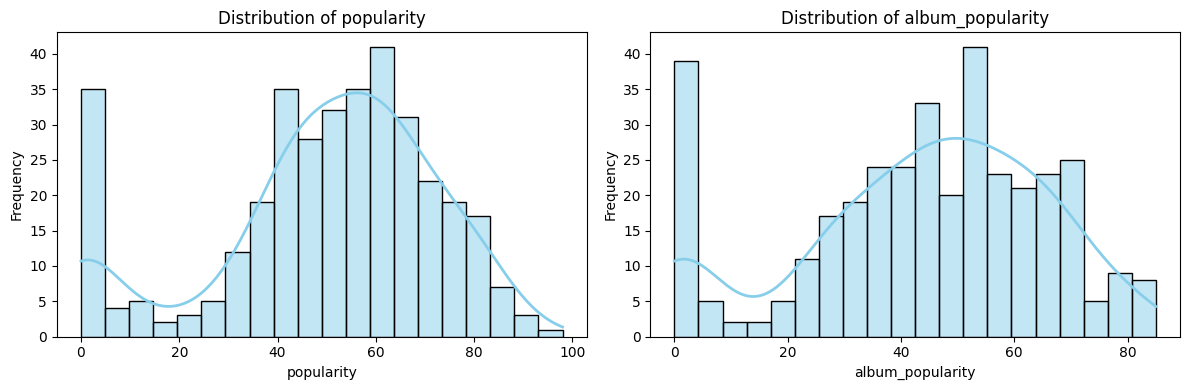

In [7]:
plot_numeric_distributions(tracks_df, ['album_popularity', 'popularity'])

In [8]:
# get album release date
def get_album_release_date(track):
    album_id = track['album_id']
    album = albums_df[albums_df['id'] == album_id].to_dict('records')
    if not album:
        return None
    album = album[0]
    return album['release_date']

tracks_df['album_release_date'] = tracks_df.apply(get_album_release_date, axis=1).astype('datetime64[ms]')
tracks_df['album_release_date'] = tracks_df['album_release_date'].astype('datetime64[ns]')

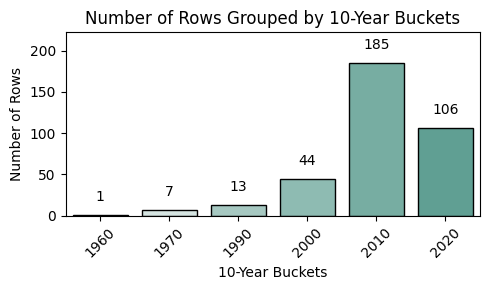

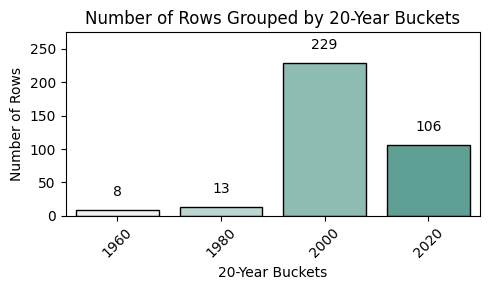

In [9]:
plot_by_year_buckets(tracks_df, 'album_release_date', [10, 20])

In [10]:
# get album type
def get_album_type(track):
    album_id = track['album_id']
    album = albums_df[albums_df['id'] == album_id].to_dict('records')
    if not album:
        return None
    album = album[0]
    return album['type']

tracks_df['album_type'] = tracks_df.apply(get_album_type, axis=1)

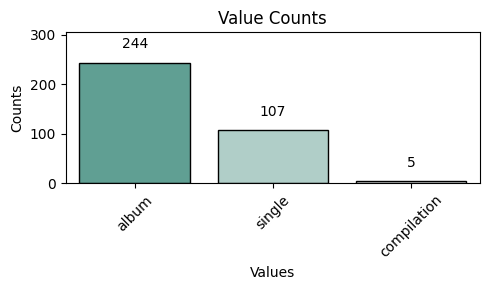

In [11]:
plot_value_counts(tracks_df, 'album_type')

## Let's see what we can extract from artists

In [12]:
# get number of spotify genres
def get_spotify_genres_count(track):
    artist_ids = track['artists']
    genres = set()
    for id in artist_ids:
        artist = artists_df[artists_df['id'] == id].to_dict('records')
        if not artist:
            continue
        artist = artist[0]
        artist_genres = set(artist['genres'])
        genres = genres.union(artist_genres)
    return len(genres)

tracks_df['sp_artist_genres_count'] = tracks_df.apply(get_spotify_genres_count, axis=1)

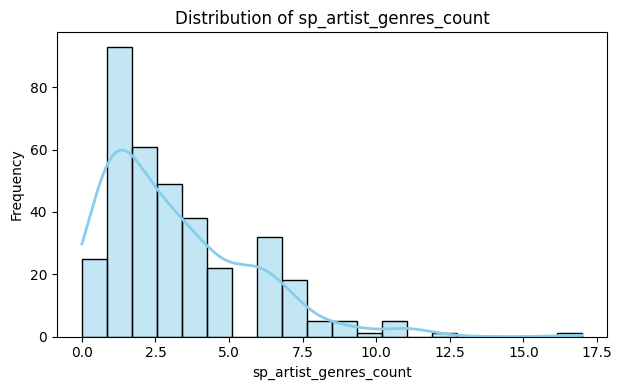

In [13]:
plot_numeric_distributions(tracks_df, ['sp_artist_genres_count'])

In [14]:
# get artist popularity
def get_artist_popularity(track):
    artist_ids = track['artists']
    popularities = []
    for id in artist_ids:
        artist = artists_df[artists_df['id'] == id].to_dict('records')
        if not artist:
            continue
        artist = artist[0]
        popularities.append(artist['popularity'])
    return sum(popularities) / len(popularities) if popularities else None

tracks_df['artist_popularity'] = tracks_df.apply(get_artist_popularity, axis=1)

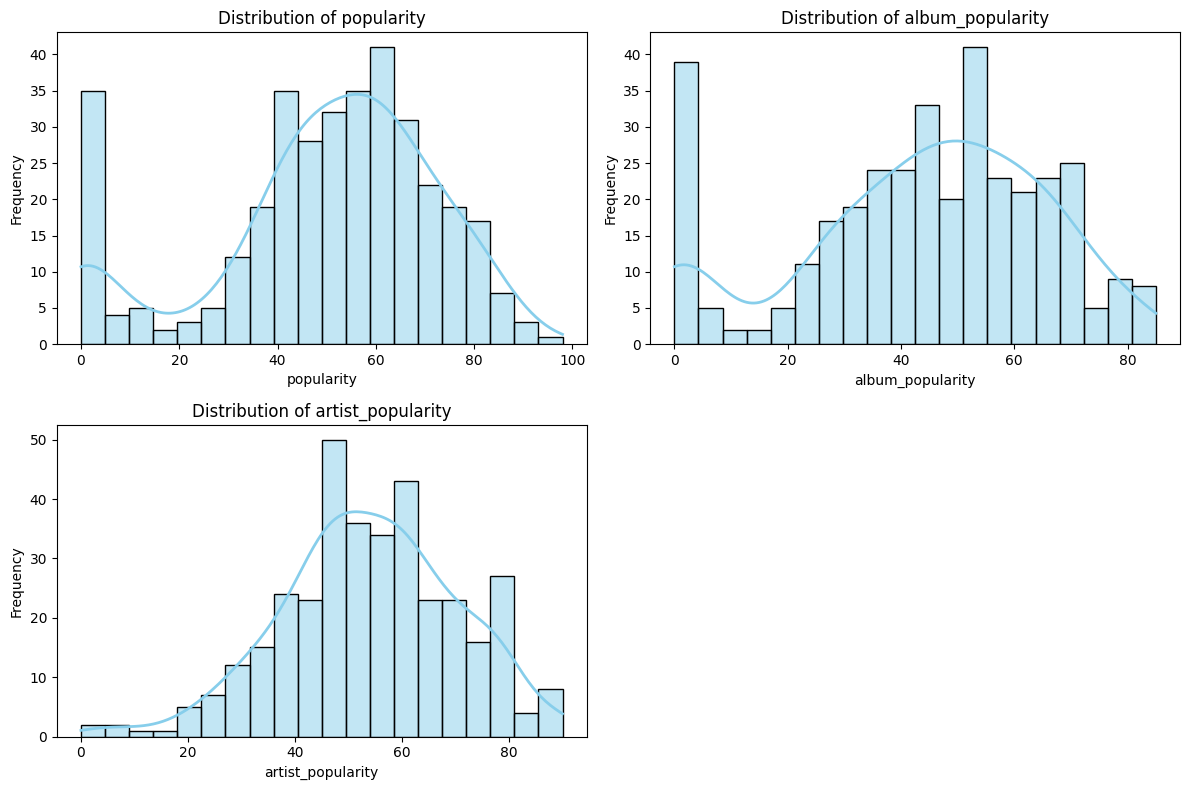

In [15]:
plot_numeric_distributions(tracks_df, ['artist_popularity', 'album_popularity', 'popularity'])

In [16]:
# get artist followers
def get_artist_followers(track):
    artist_ids = track['artists']
    followers = []
    for id in artist_ids:
        artist = artists_df[artists_df['id'] == id].to_dict('records')
        if not artist:
            continue
        artist = artist[0]
        followers.append(artist['followers'])
    return sum(followers) / len(followers) if followers else None

tracks_df['artist_followers'] = tracks_df.apply(get_artist_followers, axis=1)

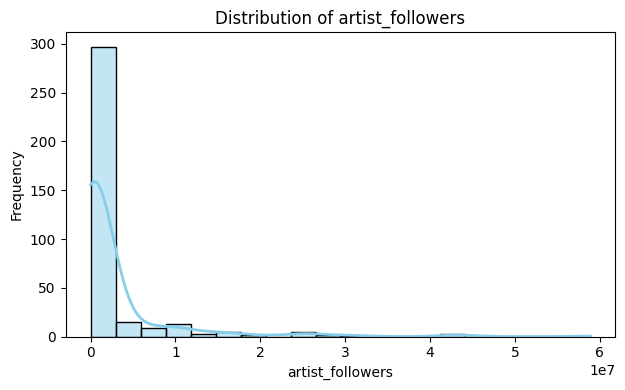

In [17]:
plot_numeric_distributions(tracks_df, ['artist_followers'])

In [18]:
# get album count of artist
def get_artist_album_count(track):
    artist_ids = track['artists']
    albums = []
    for id in artist_ids:
        artist = artists_df[artists_df['id'] == id].to_dict('records')
        if not artist:
            continue
        artist = artist[0]
        albums.append(len(artist['albums']))
    return sum(albums) / len(albums) if albums else None

tracks_df['artist_album_count'] = tracks_df.apply(get_artist_album_count, axis=1)

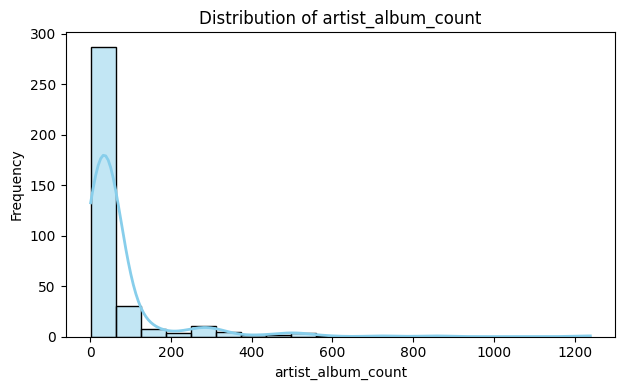

In [19]:
plot_numeric_distributions(tracks_df, ['artist_album_count'])

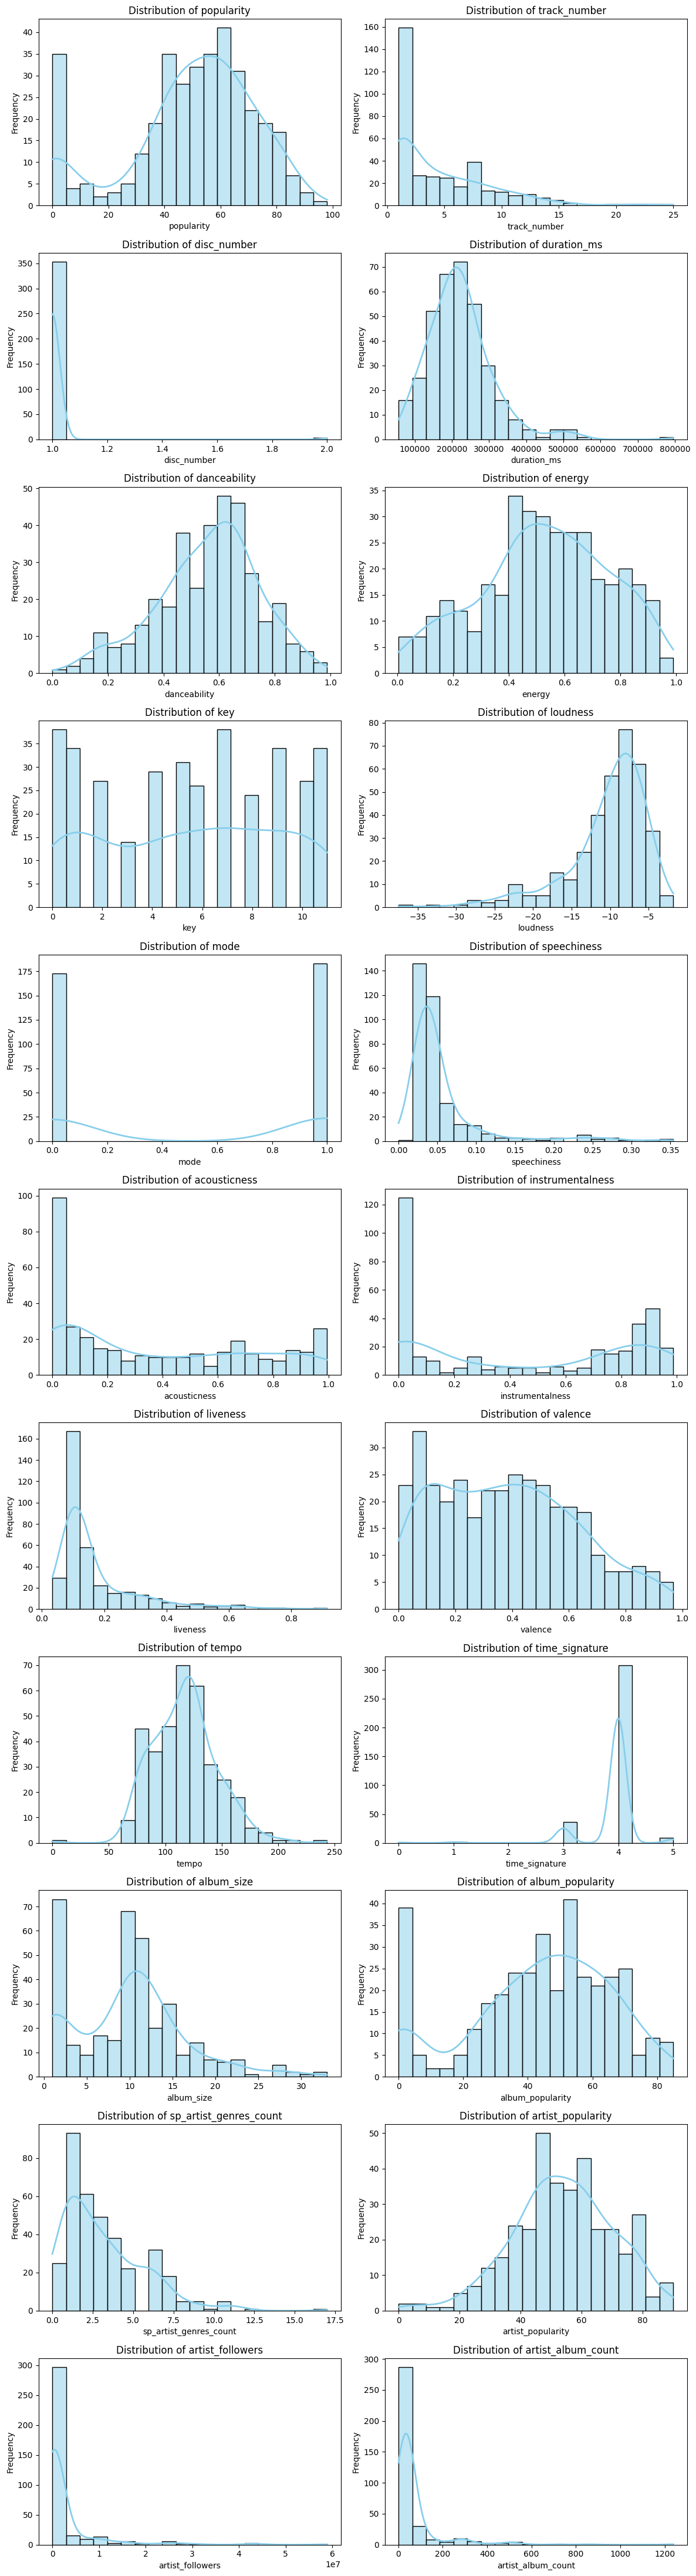

In [20]:
plot_numeric_distributions(tracks_df)

In [21]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   added_at                356 non-null    datetime64[ns]
 1   id                      356 non-null    object        
 2   uri                     356 non-null    object        
 3   name                    356 non-null    object        
 4   popularity              356 non-null    int64         
 5   track_number            356 non-null    int64         
 6   disc_number             356 non-null    int64         
 7   explicit                356 non-null    bool          
 8   duration_ms             356 non-null    int64         
 9   album_id                356 non-null    object        
 10  album_name              356 non-null    object        
 11  album_uri               356 non-null    object        
 12  artists                 356 non-null    object    

In [22]:
with open('../data/feature_extr_tracks.json', 'w') as f:
    f.write(tracks_df.to_json(orient='records'))

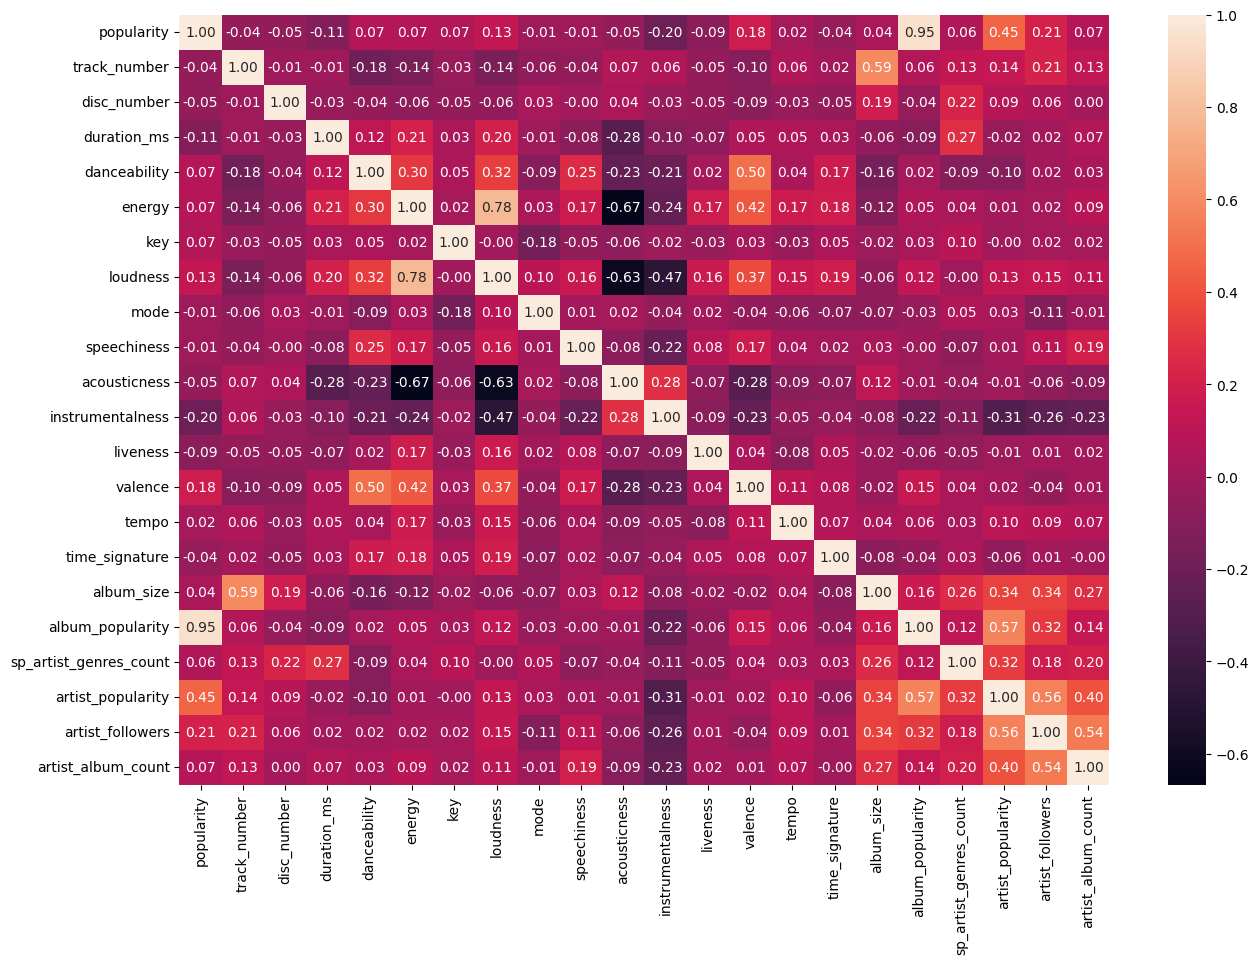

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# select only numeric columns and the target 'sub_genre'
only_numeric_tracks_df = tracks_df.select_dtypes(include=[np.number]).copy()
correlation_matrix = only_numeric_tracks_df.corr()
only_numeric_tracks_df['sub_genre'] = tracks_df['sub_genre']
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [24]:
print(tracks_df.isna().sum())

added_at                  0
id                        0
uri                       0
name                      0
popularity                0
track_number              0
disc_number               0
explicit                  0
duration_ms               0
album_id                  0
album_name                0
album_uri                 0
artists                   0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
sub_genre                 0
main_genre                0
album_size                0
album_popularity          0
album_release_date        0
album_type                0
sp_artist_genres_count    0
artist_popularity         0
artist_followers          0
artist_album_count        0
dtype: int64


In [25]:
# get rows where album_size is null, album_popularity is null, album_release_date is null, album_type is null, artist_popularity is null, artist_followers is null, artist_album_count is null , do it with or condition
null_rows = tracks_df[tracks_df['album_size'].isnull() | tracks_df['album_popularity'].isnull() | tracks_df['album_release_date'].isnull() | tracks_df['album_type'].isnull() | tracks_df['artist_popularity'].isnull() | tracks_df['artist_followers'].isnull() | tracks_df['artist_album_count'].isnull()]

In [26]:
null_rows 

,added_at,id,uri,name,popularity,track_number,disc_number,explicit,duration_ms,album_id,...,sub_genre,main_genre,album_size,album_popularity,album_release_date,album_type,sp_artist_genres_count,artist_popularity,artist_followers,artist_album_count


In [27]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode categorical target
label_encoder = LabelEncoder()
tracks_df['sub_genre_encoded'] = label_encoder.fit_transform(tracks_df['sub_genre'])

# Scale features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(tracks_df.select_dtypes(include=[float, int, float]))

# Mutual Information
mi_scores = mutual_info_classif(scaled_features, tracks_df['sub_genre_encoded'])
mi_df = pd.DataFrame({'Feature': tracks_df.select_dtypes(include=[float, int, float]).columns, 'MI Score': mi_scores})
selected_features = mi_df.sort_values(by='MI Score', ascending=False).head(10)['Feature'].tolist()
print("Selected features based on Mutual Information:", selected_features)


c:\Users\Akos Schneider\OneDrive\Asztali gép\University\UPC-FIB\2\ML\project\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Akos Schneider\OneDrive\Asztali gép\University\UPC-FIB\2\ML\project\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Selected features based on Mutual Information: ['sub_genre_encoded', 'artist_followers', 'artist_popularity', 'sp_artist_genres_count', 'time_signature', 'instrumentalness', 'acousticness', 'album_size', 'artist_album_count', 'energy']


In [28]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode categorical target
label_encoder = LabelEncoder()
tracks_df['sub_genre_encoded'] = label_encoder.fit_transform(tracks_df['sub_genre'])

# Scale features
scaler = MinMaxScaler()

# Exclude the target variable from the features
features = tracks_df.select_dtypes(include=[float, int]).drop(columns=['sub_genre_encoded']).columns
scaled_features = scaler.fit_transform(tracks_df[features])

# Chi-Squared test
chi_scores = chi2(scaled_features, tracks_df['sub_genre_encoded'])
chi2_df = pd.DataFrame({'Feature': features, 'Score': chi_scores[0], 'p-value': chi_scores[1]})
selected_features = chi2_df[chi2_df['p-value'] < 0.05]['Feature'].tolist()
print("Selected features based on Chi-Squared Test:", selected_features)


Selected features based on Chi-Squared Test: ['instrumentalness']


In [29]:
chi2_df

,Feature,Score,p-value
0,popularity,6.046134,0.999391
1,track_number,7.026037,0.998091
2,disc_number,8.311559,0.993676
3,duration_ms,2.607289,1.000000
4,danceability,4.481655,0.999947
5,energy,6.993745,0.998154
6,key,3.125218,0.999998
7,loudness,2.699383,0.999999
8,mode,16.502183,0.740805
9,speechiness,7.313689,0.997438


In [30]:
from sklearn.feature_selection import mutual_info_classif

# Mutual Information
mi_scores = mutual_info_classif(scaled_features, tracks_df['sub_genre_encoded'])
mi_df = pd.DataFrame({'Feature': features, 'MI Score': mi_scores})
selected_features = mi_df.sort_values(by='MI Score', ascending=False).head(10)['Feature'].tolist()
print("Selected features based on Mutual Information:", selected_features)


Selected features based on Mutual Information: ['time_signature', 'artist_followers', 'artist_popularity', 'sp_artist_genres_count', 'instrumentalness', 'acousticness', 'album_size', 'energy', 'artist_album_count', 'popularity']


In [31]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# RFE with Random Forest
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(scaled_features, tracks_df['sub_genre_encoded'])
selected_features = features[rfe.support_].tolist()
print("Selected features based on RFE:", selected_features)


Selected features based on RFE: ['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'valence', 'sp_artist_genres_count', 'artist_popularity', 'artist_followers', 'artist_album_count']


In [32]:
# Tree-Based Feature Selection
model.fit(scaled_features, tracks_df['sub_genre_encoded'])
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
selected_features = importance_df.sort_values(by='Importance', ascending=False).head(10)['Feature'].tolist()
print("Selected features based on Tree-Based Feature Selection:", selected_features)


Selected features based on Tree-Based Feature Selection: ['danceability', 'instrumentalness', 'artist_followers', 'sp_artist_genres_count', 'artist_album_count', 'duration_ms', 'speechiness', 'artist_popularity', 'valence', 'loudness']


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Logistic Regression with L1 regularization
logistic = LogisticRegression(C=1.0, penalty='l1', solver='liblinear')
logistic.fit(scaled_features, tracks_df['sub_genre_encoded'])

# Select features with non-zero coefficients
model = SelectFromModel(logistic, prefit=True)
selected_features = features[model.get_support()].tolist()
print("Selected features based on L1 Regularization:", selected_features)


Selected features based on L1 Regularization: ['popularity', 'track_number', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'album_size', 'album_popularity', 'sp_artist_genres_count', 'artist_popularity', 'artist_followers', 'artist_album_count']


In [34]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=10)
pca.fit(scaled_features)
pca_components = pca.transform(scaled_features)
explained_variance = pca.explained_variance_ratio_
selected_features = ['PC'+str(i+1) for i in range(len(explained_variance))]
print("Selected features based on PCA:", selected_features)


Selected features based on PCA: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
